In [11]:
import os
import joblib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
DATA_PATH_EARLY_DETECTION = "C:/Users/Welcome/BE_PROJECT/dataset/diabetes_data_upload.csv"

In [12]:
actual_patient_data = pd.read_csv(DATA_PATH_EARLY_DETECTION)
actual_patient_data.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [13]:
actual_patient_data['class'].value_counts()

Positive    320
Negative    200
Name: class, dtype: int64

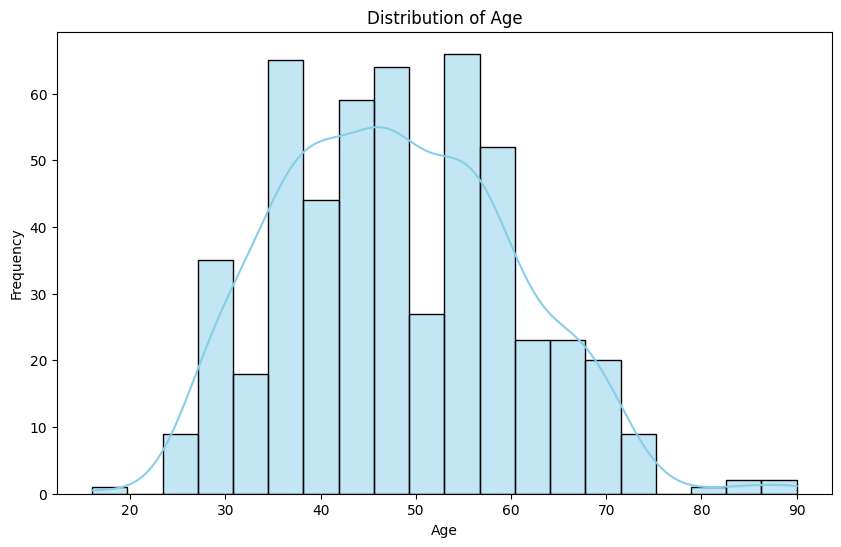

In [14]:
# Univariate Analysis: Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(actual_patient_data['Age'], kde=True, color='skyblue', bins=20)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

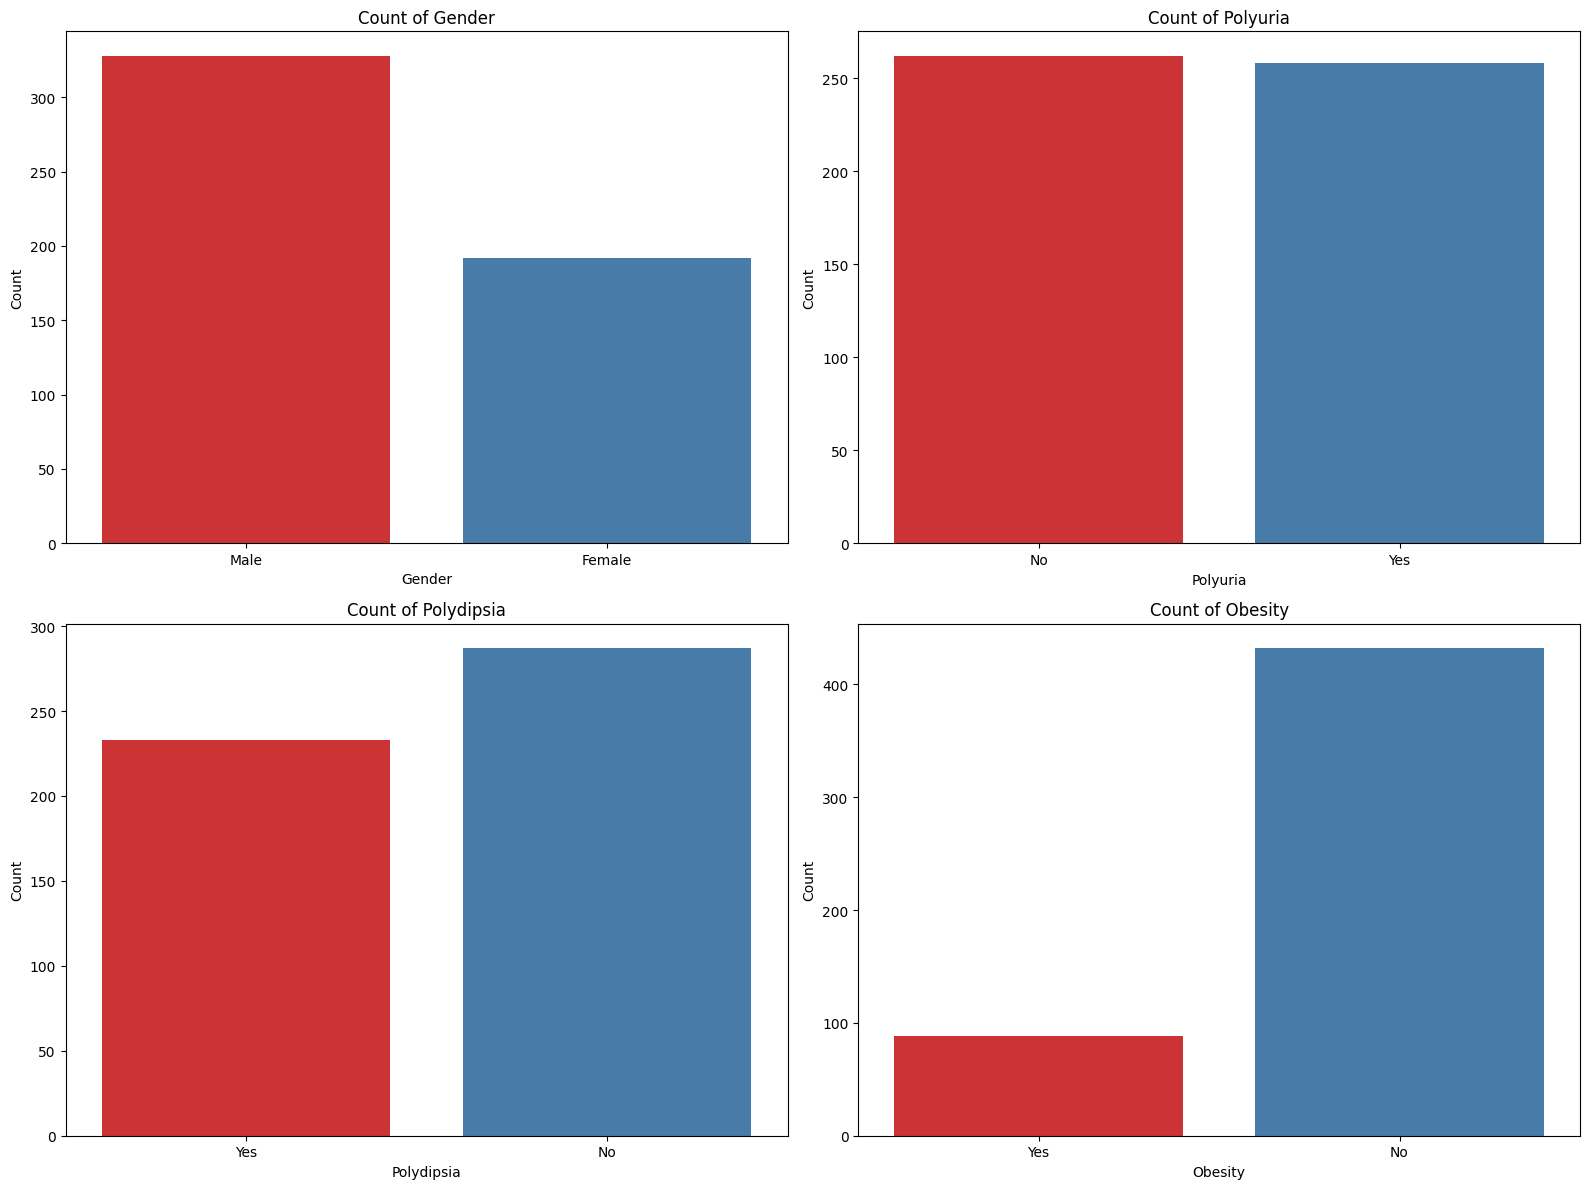

In [15]:
# Categorical Variable Analysis: Count Plots
# how different categories within each variable are distributed across the dataset.
categorical_features = ['Gender', 'Polyuria', 'Polydipsia', 'Obesity']
plt.figure(figsize=(16, 12))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=feature, data=actual_patient_data, palette='Set1')
    plt.title(f'Count of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()


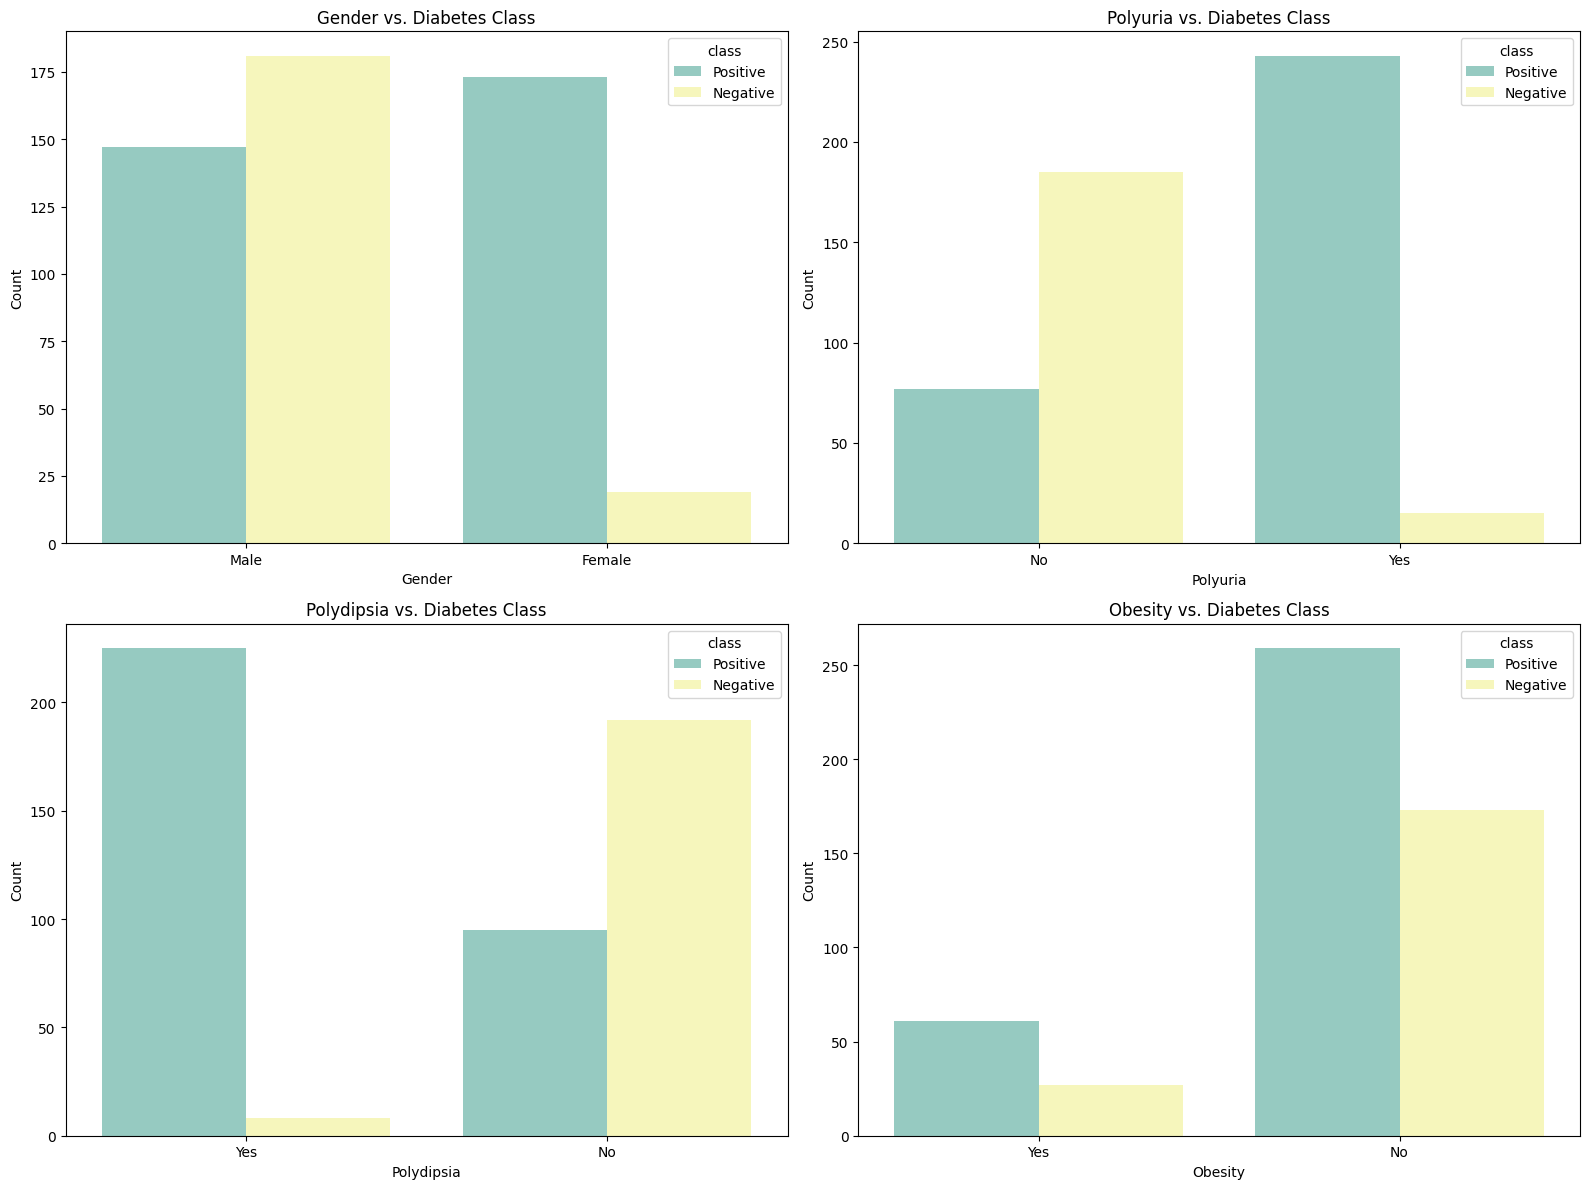

In [16]:
# Categorical Variable Analysis: Bar Plots with Target Variable (class)
plt.figure(figsize=(16, 12))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=feature, hue='class', data=actual_patient_data, palette='Set3')
    plt.title(f'{feature} vs. Diabetes Class')
    plt.xlabel(feature)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()


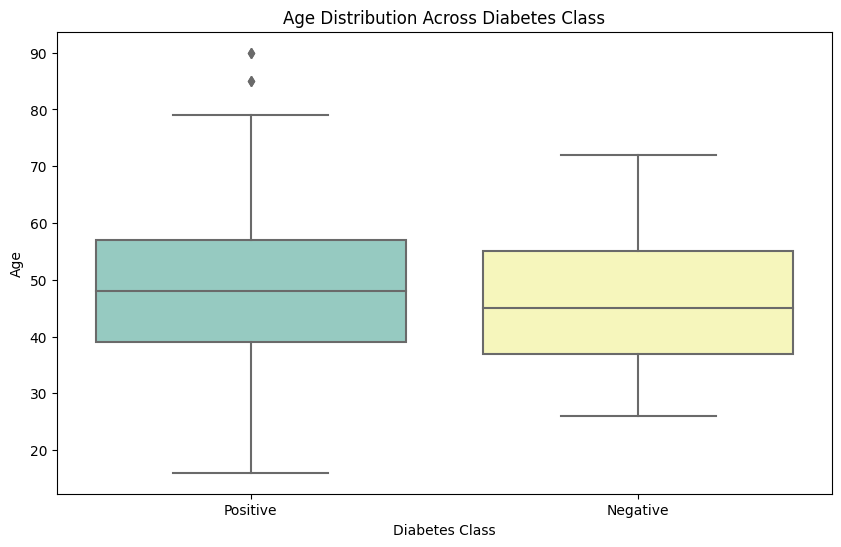

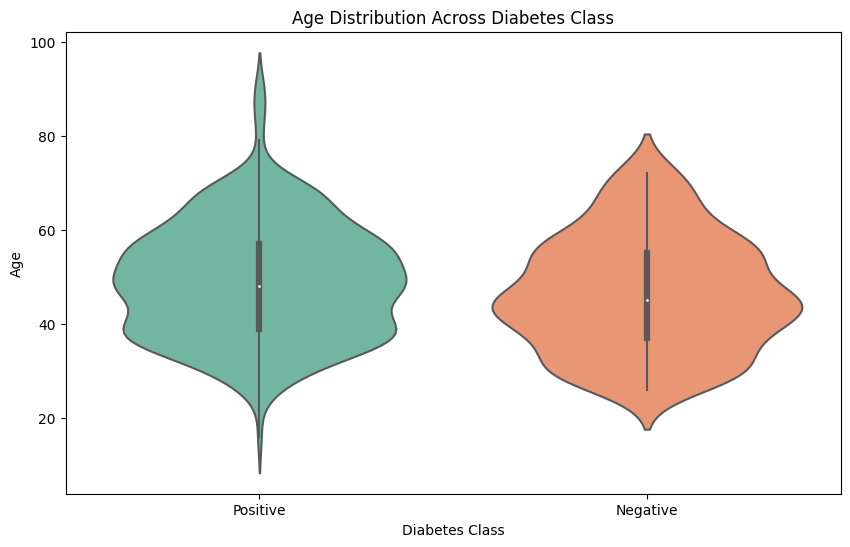

In [17]:
# Bivariate Analysis: Age vs. Target Variable (class) using Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='class', y='Age', data=actual_patient_data, palette='Set3')
plt.title('Age Distribution Across Diabetes Class')
plt.xlabel('Diabetes Class')
plt.ylabel('Age')
plt.show()

# Bivariate Analysis: Age vs. Target Variable (class) using Violin Plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='class', y='Age', data=actual_patient_data, palette='Set2')
plt.title('Age Distribution Across Diabetes Class')
plt.xlabel('Diabetes Class')
plt.ylabel('Age')
plt.show()


In [18]:
converted_data=pd.get_dummies(actual_patient_data, prefix=['Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'], drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(converted_data.drop('class_Positive', axis=1),converted_data['class_Positive'], test_size=0.3, random_state=0)

classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
from sklearn import metrics
acc = metrics.accuracy_score(y_test, y_pred)

print(f"Accuracy score is: {acc}")

joblib.dump(classifier, f"C:/Users/Welcome/BE_PROJECT/models/diabetes_early_stage.pkl")

Accuracy score is: 0.9807692307692307


['C:/Users/Welcome/BE_PROJECT/models/diabetes_early_stage.pkl']

In [19]:

model = joblib.load(f"C:/Users/Welcome/BE_PROJECT/models/diabetes_early_stage.pkl")


def get_user_input():
    age = int(input("Enter Age: "))
    gender = input("Enter Gender (Male/Female): ").strip().capitalize()
    polyuria = input("Do you have Polyuria (Yes/No): ").strip().capitalize()
    polydipsia = input("Do you have Polydipsia (Yes/No): ").strip().capitalize()
    sudden_weight_loss = input("Have you experienced sudden weight loss (Yes/No): ").strip().capitalize()
    weakness = input("Do you feel weakness (Yes/No): ").strip().capitalize()
    polyphagia = input("Do you have Polyphagia (Yes/No): ").strip().capitalize()
    genital_thrush = input("Do you have Genital Thrush (Yes/No): ").strip().capitalize()
    visual_blurring = input("Do you experience visual blurring (Yes/No): ").strip().capitalize()
    itching = input("Do you have Itching (Yes/No): ").strip().capitalize()
    irritability = input("Do you feel Irritability (Yes/No): ").strip().capitalize()
    delayed_healing = input("Do you have delayed healing (Yes/No): ").strip().capitalize()
    partial_paresis = input("Do you have partial paresis (Yes/No): ").strip().capitalize()
    muscle_stiffness = input("Do you experience muscle stiffness (Yes/No): ").strip().capitalize()
    alopecia = input("Do you have Alopecia (Yes/No): ").strip().capitalize()
    obesity = input("Are you Obese (Yes/No): ").strip().capitalize()

    # Creating a dictionary for input
    data = {
        'Age': [age],
        'Gender_Male': [1 if gender == 'Male' else 0],
        'Polyuria_Yes': [1 if polyuria == 'Yes' else 0],
        'Polydipsia_Yes': [1 if polydipsia == 'Yes' else 0],
        'sudden weight loss_Yes': [1 if sudden_weight_loss == 'Yes' else 0],
        'weakness_Yes': [1 if weakness == 'Yes' else 0],
        'Polyphagia_Yes': [1 if polyphagia == 'Yes' else 0],
        'Genital thrush_Yes': [1 if genital_thrush == 'Yes' else 0],
        'visual blurring_Yes': [1 if visual_blurring == 'Yes' else 0],
        'Itching_Yes': [1 if itching == 'Yes' else 0],
        'Irritability_Yes': [1 if irritability == 'Yes' else 0],
        'delayed healing_Yes': [1 if delayed_healing == 'Yes' else 0],
        'partial paresis_Yes': [1 if partial_paresis == 'Yes' else 0],
        'muscle stiffness_Yes': [1 if muscle_stiffness == 'Yes' else 0],
        'Alopecia_Yes': [1 if alopecia == 'Yes' else 0],
        'Obesity_Yes': [1 if obesity == 'Yes' else 0],
    }

    return pd.DataFrame(data)

# Getting user input
user_input_data = get_user_input()

# Predict using the loaded model
prediction = model.predict(user_input_data)

# Print the result
if prediction[0] == 1:
    print("The person is likely to have diabetes.")
else:
    print("The person is not likely to have diabetes.")


Enter Age: 35
Enter Gender (Male/Female): Male
Do you have Polyuria (Yes/No): No
Do you have Polydipsia (Yes/No): Yes
Have you experienced sudden weight loss (Yes/No): No
Do you feel weakness (Yes/No): Yes
Do you have Polyphagia (Yes/No): No
Do you have Genital Thrush (Yes/No): No
Do you experience visual blurring (Yes/No): No
Do you have Itching (Yes/No): Yes
Do you feel Irritability (Yes/No): Yes
Do you have delayed healing (Yes/No): No
Do you have partial paresis (Yes/No): No
Do you experience muscle stiffness (Yes/No): No
Do you have Alopecia (Yes/No): No
Are you Obese (Yes/No): No
The person is likely to have diabetes.
